<a href="https://colab.research.google.com/github/shubham14yadav/Insurance_analysis/blob/main/Claims_Insurance_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

data = {
    'Policyholder ID': [101, 102, 103, 104, 105],
    'Policyholder Name': ['John Doe', 'Jane Smith', 'Mike Johnson', 'Emma Lee', 'Chris Brown'],
    'Claim ID': [1001, 1002, 1003, 1004, 1005],
    'Date of Claim': ['2023-07-15', '2023-07-20', '2023-07-25', '2023-07-28', '2023-07-30'],
    'Date of Service': ['2023-06-25', '2023-07-05', '2023-07-10', '2023-07-20', '2023-07-28'],
    'Diagnosis Codes': ['A123, B456', 'C789', 'D101', 'E202', 'F303'],
    'Procedure Codes': ['P001, P002', 'P003', 'P004', 'P005', 'P006'],
    'Description of the Claim': ['Hospitalization', 'Surgery', 'Medication', 'Lab Test', 'Consultation'],
    'Claim Amount': [5000, 3000, 1500, 800, 2000],
    'Paid Amount': [5000, 2500, 1200, 600, 1800],
    'Deductible': [1000, 1000, 500, 500, 1000],
    'Co-Insurance': [0.1, 0.2, 0.1, 0.2, 0.1],
    'Claim Status': ['Approved', 'Approved', 'Denied', 'Pending', 'Approved'],
    'Policy ID': [201, 202, 203, 204, 205],
    'Policy Start Date': ['2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01', '2023-05-01'],
    'Policy End Date': ['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01', '2024-05-01'],
    'Policy Limits': [10000, 5000, 2000, 3000, 10000],
    'Policy Premium': [1000, 800, 400, 600, 1000],
    'Provider ID': [301, 302, 303, 304, 305],
    'Provider Name': ['ABC Hospital', 'XYZ Clinic', 'LMN Pharmacy', 'EFG Labs', 'QRS Clinic'],
    'Geographic Region': ['East', 'West', 'North', 'South', 'Central'],
    'Plan Type': ['Individual', 'Family', 'Individual', 'Family', 'Individual'],
    'Employer Name': ['Company A', 'Company B', 'Company C', 'Company D', 'Company E']
}

df = pd.DataFrame(data)
df['Date of Claim'] = pd.to_datetime(df['Date of Claim'])
df['Date of Service'] = pd.to_datetime(df['Date of Service'])
df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
df['Policy End Date'] = pd.to_datetime(df['Policy End Date'])


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest


#Claims Analysis

average_claim_amount = df['Claim Amount'].mean()
average_paid_amount = df['Paid Amount'].mean()

# number of claims by claim status
claim_status_counts = df['Claim Status'].value_counts()


Text(0.5, 1.0, 'Claims Analysis by Status')

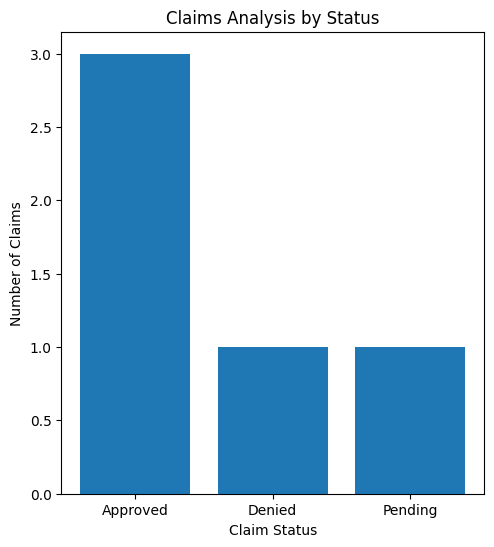

In [8]:
# Visualization of claims analysis
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(claim_status_counts.index, claim_status_counts.values)
plt.xlabel('Claim Status')
plt.ylabel('Number of Claims')
plt.title('Claims Analysis by Status')


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


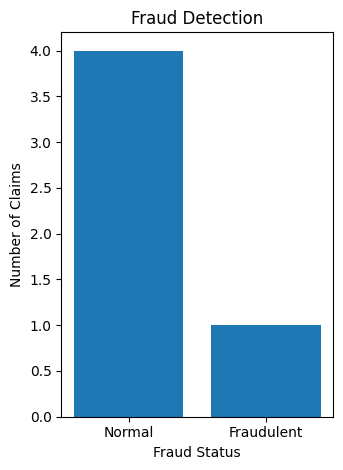

In [9]:
# Fraud Detection
# Use Isolation Forest to identify potential fraudulent claims
# We will use 'Claim Amount' and 'Paid Amount' as features for simplicity
features = df[['Claim Amount', 'Paid Amount']]
model = IsolationForest(contamination=0.01)  # Adjust contamination based on the expected fraud rate
df['Fraudulent'] = model.fit_predict(features)

plt.subplot(1, 2, 2)
df['Fraudulent_label'] = df['Fraudulent'].map({1: 'Normal', -1: 'Fraudulent'})
fraud_status_counts = df['Fraudulent_label'].value_counts()
plt.bar(fraud_status_counts.index, fraud_status_counts.values)
plt.xlabel('Fraud Status')
plt.ylabel('Number of Claims')
plt.title('Fraud Detection')

plt.tight_layout()
plt.show()

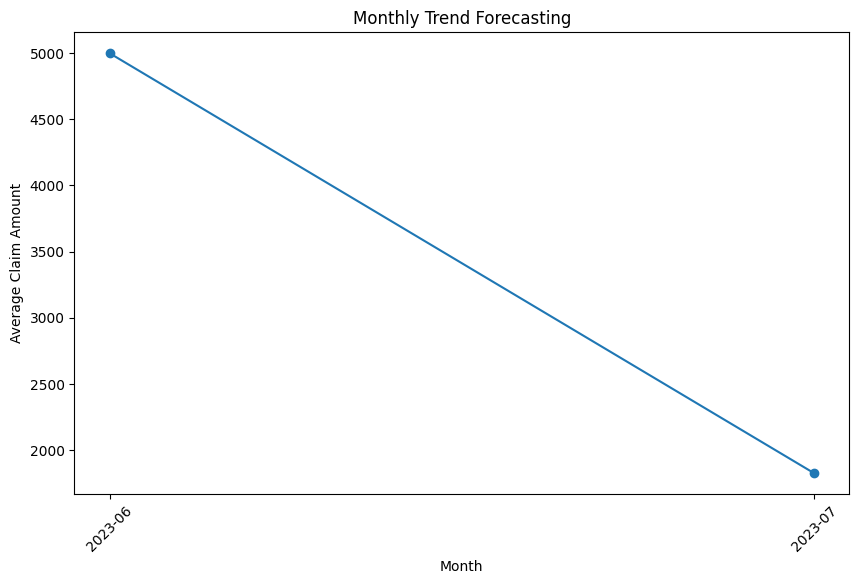

In [10]:

#Trend Forecasting
#Let's group claims by 'Date of Service' and calculate the average claim amount for each month
df['Date of Service'] = pd.to_datetime(df['Date of Service'])
monthly_trend = df.groupby(df['Date of Service'].dt.to_period('M'))['Claim Amount'].mean().reset_index()

# Convert the Period index to string representation for plotting
monthly_trend['Date of Service'] = monthly_trend['Date of Service'].astype(str)

# Visualization of trend forecasting
plt.figure(figsize=(10, 6))
plt.plot(monthly_trend['Date of Service'], monthly_trend['Claim Amount'], marker='o')
plt.xlabel('Month')
plt.ylabel('Average Claim Amount')
plt.title('Monthly Trend Forecasting')
plt.xticks(rotation=45)
plt.show()
